In [74]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import matplotlib
from scipy.ndimage import gaussian_filter1d
# plt.style.use('ggplot')
sns.set_theme(context="notebook", style="darkgrid")
sns.set(font_scale=2.0)

PROJECT_ROOT_DIR = Path().absolute().parent
PROJECT_ROOT_DIR

PosixPath('/home/sen/pythonprojects/fly-craft-examples')

In [75]:
def load_data(algo: str, filename: str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True):
    df = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / filename / "progress.csv")
    df = df[pd.notnull(df["eval/success_rate"])]
    df.insert(insert_no, "seed", [seed_str] * len(df))
    df.insert(insert_no+1, "algo", [algo] * len(df))

    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        df["eval/success_rate"] = gaussian_filter1d(df["eval/success_rate"], sigma=1)

    return df

In [76]:
def load_two_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]

    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    merge_df = pd.concat([df_first_stage,df_second_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [77]:
def load_three_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, three_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]
    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    df_three_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / three_stage_filename / "progress.csv")
    df_three_stage = df_three_stage[pd.notnull(df_three_stage["eval/success_rate"])]

    df_three_stage["time/total_timesteps"] = df_three_stage["time/total_timesteps"] + 2*time_steps_add_to_sec_stage

    merge_df = pd.concat([df_first_stage,df_second_stage,df_three_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [78]:
SMOOTH = True

# reach sparse distance 0.01 goal_range 0.8 episode 80  nstep={5,10,20}

1000
1000
1000
1000


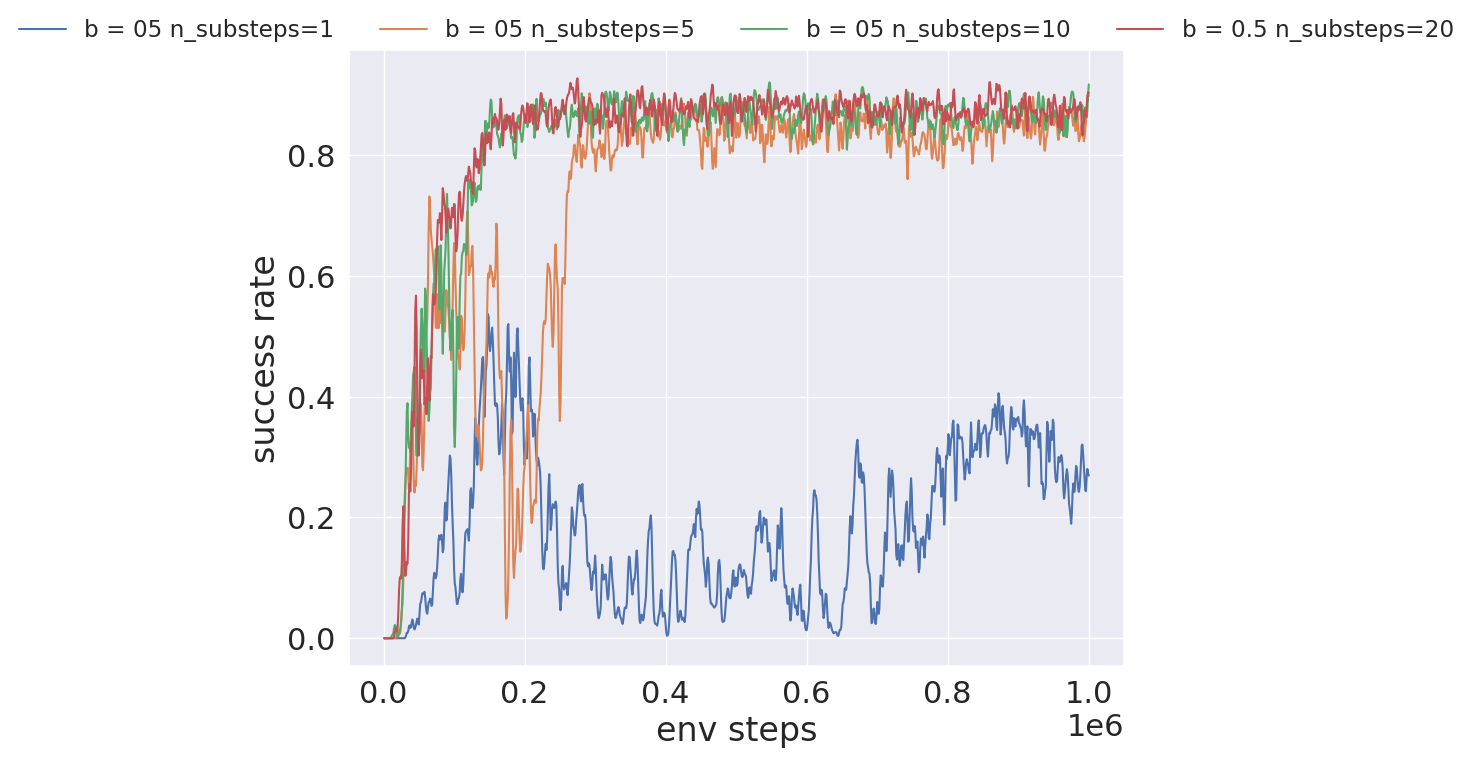

In [79]:
files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_1/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_nsteps1 = pd.concat([load_data("b = 05 n_substeps=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_nsteps1))

files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_5/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_nsteps5 = pd.concat([load_data("b = 05 n_substeps=5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_nsteps5))


files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_10/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_nsteps10 = pd.concat([load_data("b = 05 n_substeps=10", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_nsteps10))

files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_20/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL",
    # "D2D/F2F/skip_3_2_skip_1/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_4_singleRL",
    # "D2D/sac_her_10hz_128_128_b_0125_1e6steps_seed_5_singleRL"
]
seed_strs = [
   "seed 1",
    # "seed 2", 
    #  "seed 3", 
    # "seed 4", 
    # "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_nsteps20 = pd.concat([load_data("b = 0.5 n_substeps=20", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_nsteps20))


data_plot = pd.concat([
    df_reach_b_05_nsteps1,
    df_reach_b_05_nsteps5,
    df_reach_b_05_nsteps10,
    df_reach_b_05_nsteps20
,
])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# reach sparse b 0.5  n_substeps={1,3,5,10,20}  steo=3 to step=1   step=5 to step=1 


In [80]:
files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_1/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_1/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_1/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_3_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_1/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_4_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_1/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_5_singleRL",
]
seed_strs = [
    "seed 1",
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_nsteps1 = pd.concat([load_data("b = 05 n_substeps=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::10] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_nsteps1))






500


In [81]:

files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_3/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_3/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_3/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_3_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_3/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_4_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_3/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_5_singleRL",
]

seed_strs = [
   "seed 1",
    "seed 2", 
     "seed 3", 
    "seed 4", 
    "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_nsteps3 = pd.concat([load_data("b = 05 n_substeps=3", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::10] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_nsteps3))



500


In [82]:
files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_5/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_5/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_5/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_3_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_5/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_4_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/n_substeps_5/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_5_singleRL",

]

seed_strs = [
   "seed 1",
    "seed 2", 
     "seed 3", 
    "seed 4", 
    "seed 5"
]
# df_with_her = pd.concat([load_data("FlyCraft w/ HER", filename, seed_str, insert_no=14, algo_dir="rl_single").iloc[::] for filename, seed_str in zip(files, seed_strs)])
df_reach_b_05_nsteps5 = pd.concat([load_data("b = 05 n_substeps=5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::10] for filename, seed_str in zip(files, seed_strs)])
print(len(df_reach_b_05_nsteps5))


500


In [83]:
first_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_1_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_2_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_3_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_4_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_1_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_2_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_3_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_4_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_3_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_reach_b_05_substep3tosubstep1 = pd.concat([load_two_stage_data("b=0.5 substep=3 to substep=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::10] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_reach_b_05_substep3tosubstep1))

500


In [84]:
first_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_1_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_2_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_3_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_4_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_1_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_2_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_3_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_4_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/sparse/two_stage_n_substeps_5_to_n_substeps_1/b_05/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_reach_b_05_substep5tosubstep1 = pd.concat([load_two_stage_data("b=0.5 substep=5 to substep=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::10] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_reach_b_05_substep5tosubstep1))

500


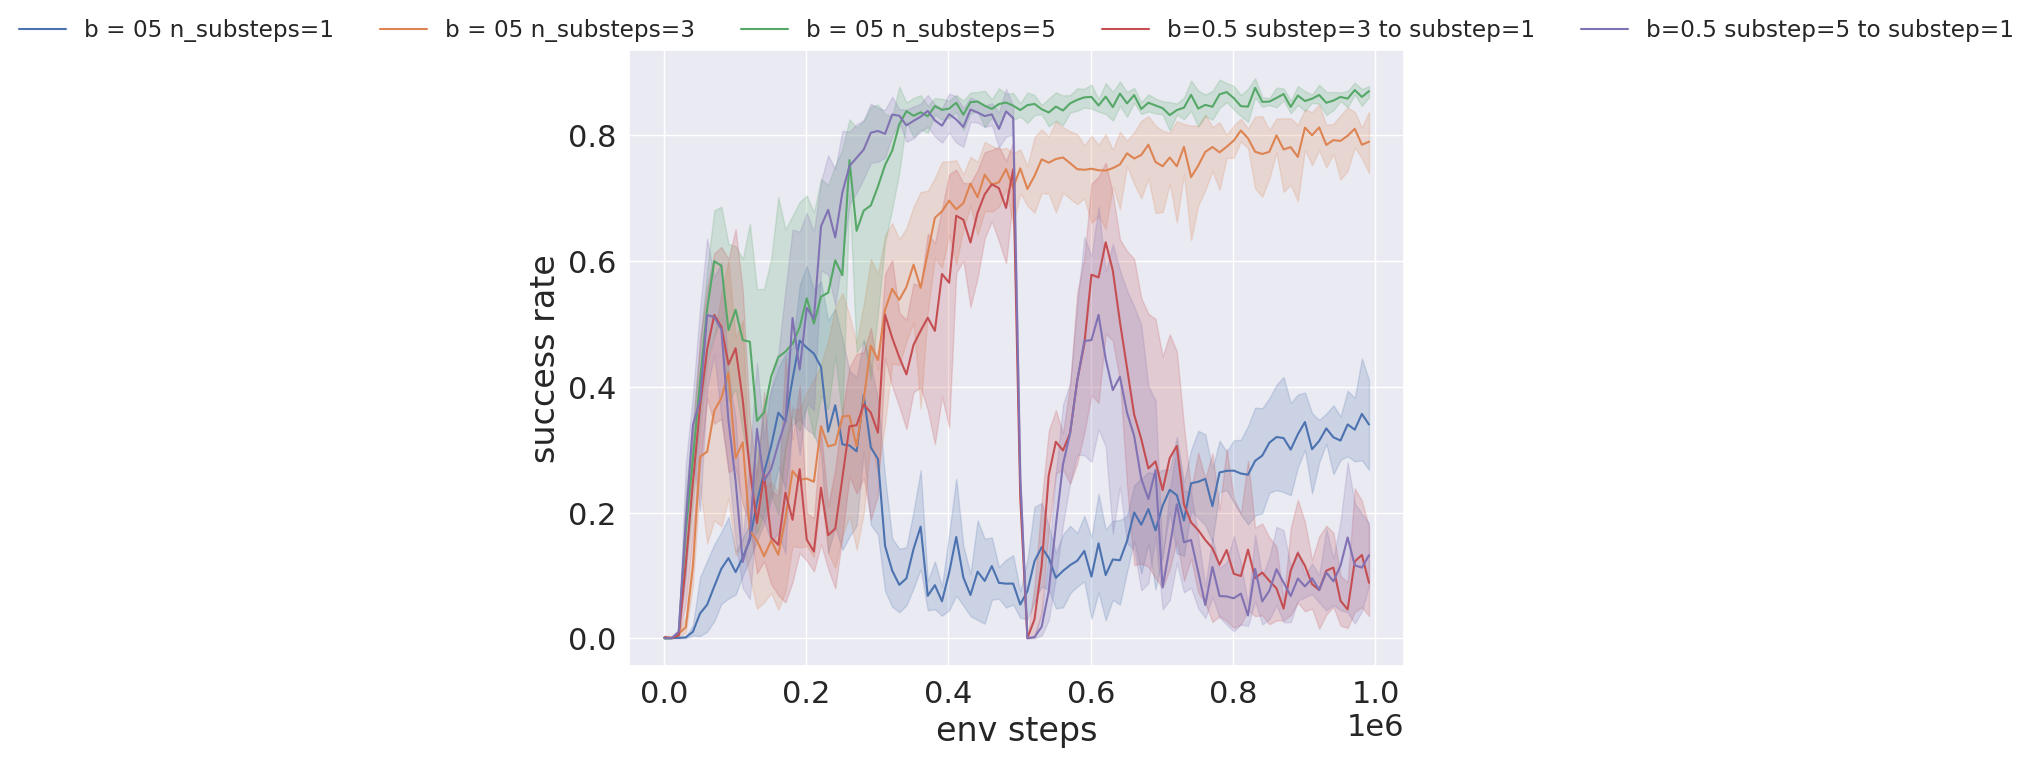

In [85]:
data_plot = pd.concat([
    df_reach_b_05_nsteps1,
    df_reach_b_05_nsteps3,
    df_reach_b_05_nsteps5,
    df_reach_b_05_substep3tosubstep1,
    df_reach_b_05_substep5tosubstep1
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# vvc F2F skip 1,3,5,10 ,skip 3 to skip 1,skip 5 to skip 1,skip 10 to skip 5 to skip 1

## skip = 1 

In [86]:
files = [
    "D2D/VVC/relative_hard/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/relative_hard/b_05/sac_her_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/relative_hard/b_05/sac_her_medium2_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/relative_hard/b_05/sac_her_medium2_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/relative_hard/b_05/sac_her_medium2_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_skip_1 = pd.concat([load_data("b=0.5 skip=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05_skip_1))


500


## skip = 3

In [87]:
files = [
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_1_singleRL", 
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_2_singleRL", 
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_3_singleRL", 
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_4_singleRL", 
    "D2D/F2F/b_05/skip_3/her_128_128_b_05_1e6steps_skip_3_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_skip_3 = pd.concat([load_data("b=0.5 skip=3", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05_skip_3))

500


## skip = 5

In [88]:
files = [
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_1_singleRL", 
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_2_singleRL", 
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_3_singleRL", 
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_4_singleRL", 
    "D2D/F2F/b_05/skip_5/her_128_128_b_05_1e6steps_skip_5_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_skip_5 = pd.concat([load_data("b=0.5 skip=5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05_skip_5))

500


## skip = 10

In [89]:
files = [
    "D2D/F2F/b_05/skip_10/her_128_128_b_05_1e6steps_skip_10_seed_1_singleRL", 
    "D2D/F2F/b_05/skip_10/her_128_128_b_05_1e6steps_skip_10_seed_2_singleRL", 
    "D2D/F2F/b_05/skip_10/her_128_128_b_05_1e6steps_skip_10_seed_3_singleRL", 
    "D2D/F2F/b_05/skip_10/her_128_128_b_05_1e6steps_skip_10_seed_4_singleRL", 
    "D2D/F2F/b_05/skip_10/her_128_128_b_05_1e6steps_skip_10_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_skip_10 = pd.concat([load_data("b=0.5 skip=10", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05_skip_10))

500


## skip = 3 to skip = 1 

In [90]:
first_files = [
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_1_singleRL",
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_2_singleRL",
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_3_singleRL",
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_4_singleRL",
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_seed_5_singleRL",
]
second_files = [
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_1_singleRL", 
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_2_singleRL", 
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_3_singleRL", 
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_4_singleRL", 
    "D2D/F2F/b_05/skip_3_2_skip_1/her_128_128_b_05_5e5steps_skip_3_to_skip_1_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_skip3toskip1 = pd.concat([load_two_stage_data("b=0.5 skip=3 to skip=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_skip3toskip1))

500


## skip = 5 to skip = 1 

In [91]:
first_files = [
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_1_singleRL",
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_2_singleRL",
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_3_singleRL",
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_4_singleRL",
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_seed_5_singleRL",
]
second_files = [
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_1_singleRL", 
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_2_singleRL", 
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_3_singleRL", 
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_4_singleRL", 
    "D2D/F2F/b_05/skip_5_2_skip_1/her_128_128_b_05_5e5steps_skip_5_to_skip_1_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_skip5toskip1 = pd.concat([load_two_stage_data("b=0.5 skip=5 to skip=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_skip5toskip1))

455


# skip 10 to skip 5 to skip 1

In [92]:
first_files = [
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_seed_1_singleRL",
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_seed_2_singleRL",
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_seed_3_singleRL",
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_seed_4_singleRL",
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_seed_5_singleRL",
]
second_files = [
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_skip_5_seed_1_singleRL", 
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_skip_5_seed_2_singleRL", 
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_skip_5_seed_3_singleRL", 
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_skip_5_seed_4_singleRL", 
    "D2D/F2F/b_05/skip_10_skip_5_skip_1/her_128_128_b_05_5e5steps_skip_10_skip_5_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_skip10toskip5toskip1 = pd.concat([load_two_stage_data("b=0.5 skip=10 to skip=5 to skip=1 zanwu", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_skip10toskip5toskip1))

468


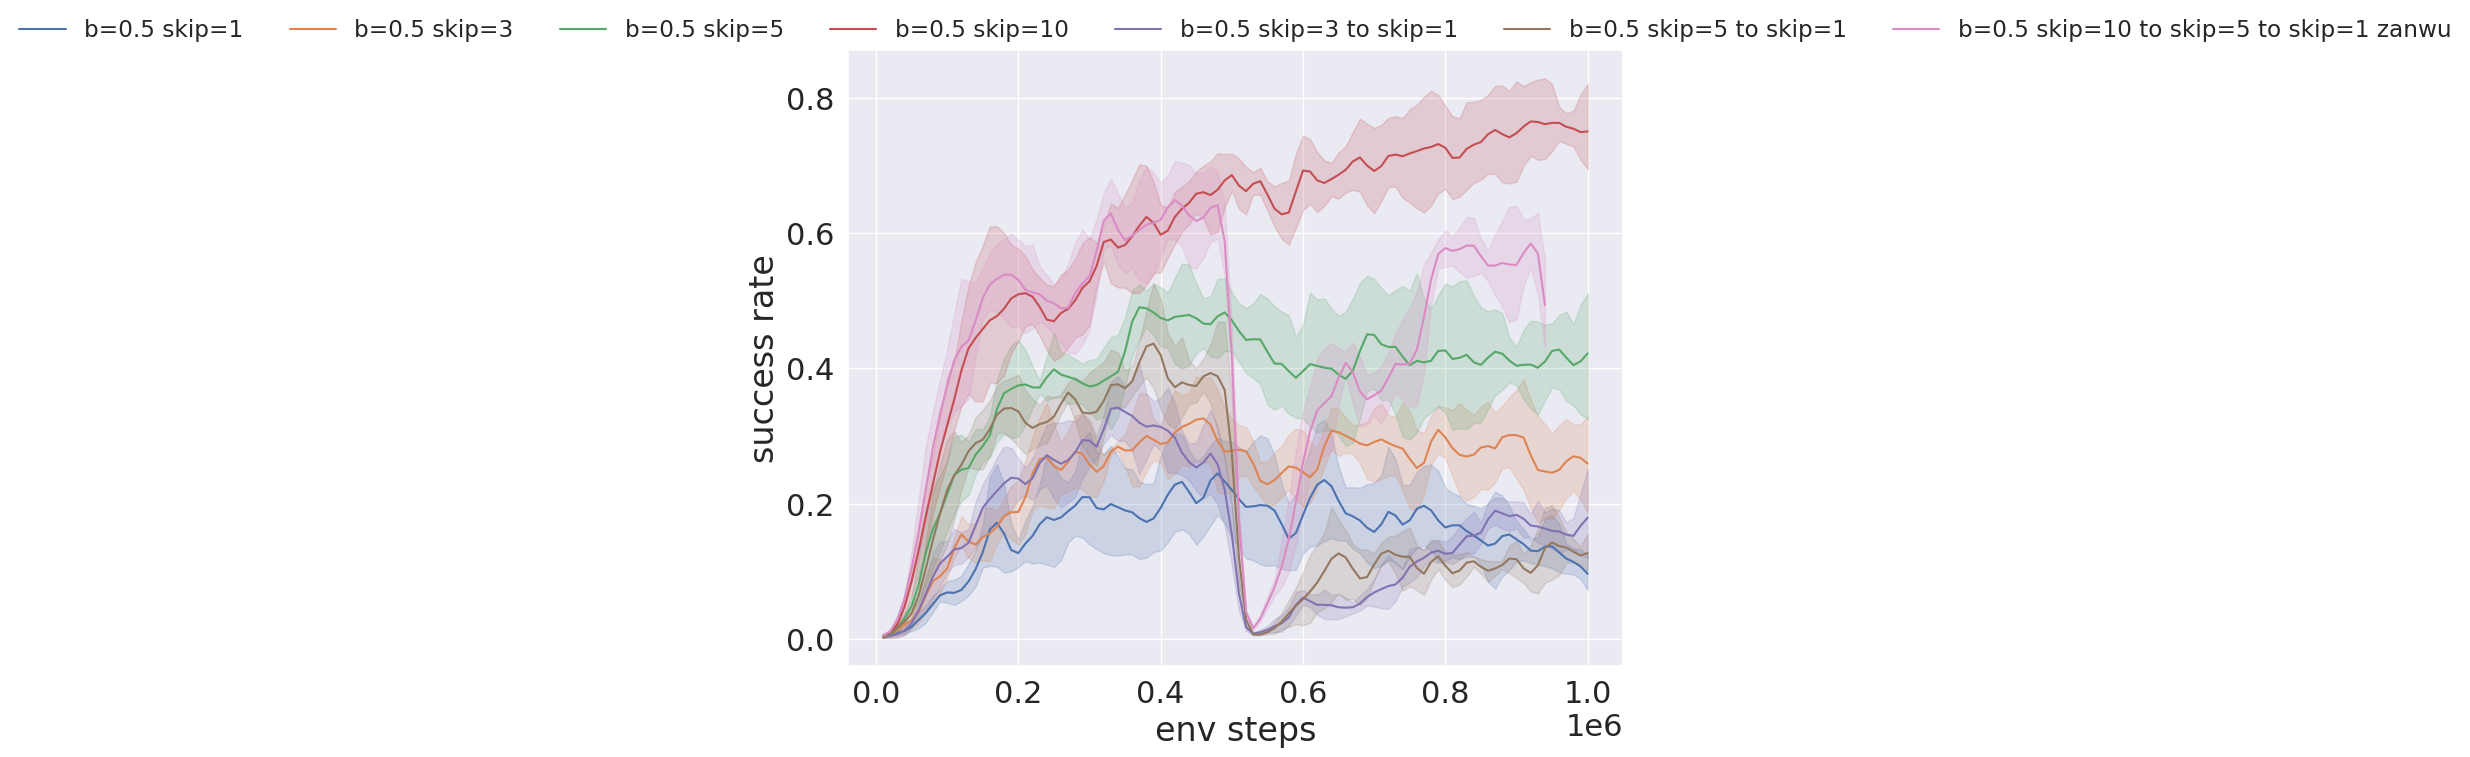

In [93]:
data_plot = pd.concat([
    df_b_05_skip_1,
    df_b_05_skip_3,
    df_b_05_skip_5,
    df_b_05_skip_10,
    df_b_05_skip3toskip1,
    df_b_05_skip5toskip1,
    df_b_05_skip10toskip5toskip1
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# reach dense 

## b = 1 n_substeps = 1

In [94]:
files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_1/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_1/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_1/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_1/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_1/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_substeps1 = pd.concat([load_data("b=1 substep=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::10] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_substeps1))

500


## b = 1  n_substeps = 3

In [95]:
files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_3/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_3/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_3/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_3/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_3/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_substeps3 = pd.concat([load_data("b=1 substep=3", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::10] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_substeps3))

500


## b = 1  n_substeps = 5

In [96]:
files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_5/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_5/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_5/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_5/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/n_substeps_5/b_1/sac_her_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_substeps5 = pd.concat([load_data("b=1 substep=5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::10] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_substeps5))

500


## b = 1 two_stages n_substeps=3 to n substeps = 1

In [97]:
first_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_1_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_2_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_3_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_4_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_1_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_2_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_3_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_4_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_3_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_3_5e5steps_n_substeps_1_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b1_substep3tosubstep1 = pd.concat([load_two_stage_data("b=1 substeps=3 to substeos =1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::10] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b1_substep3tosubstep1))

500


## b = 1 two_stages n_substeps=5 to n substeps = 1

In [98]:

first_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_1_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_2_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_3_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_4_singleRL",
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_1_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_2_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_3_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_4_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/two_stage_n_substeps_5_to_n_substeps_1/b_1/sac_her_10hz_128_128_n_substeps_5_5e5steps_n_substeps_1_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b1_substep5tosubstep1 = pd.concat([load_two_stage_data("b=1 substeps=5 to substeos =1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::10] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b1_substep5tosubstep1))

500


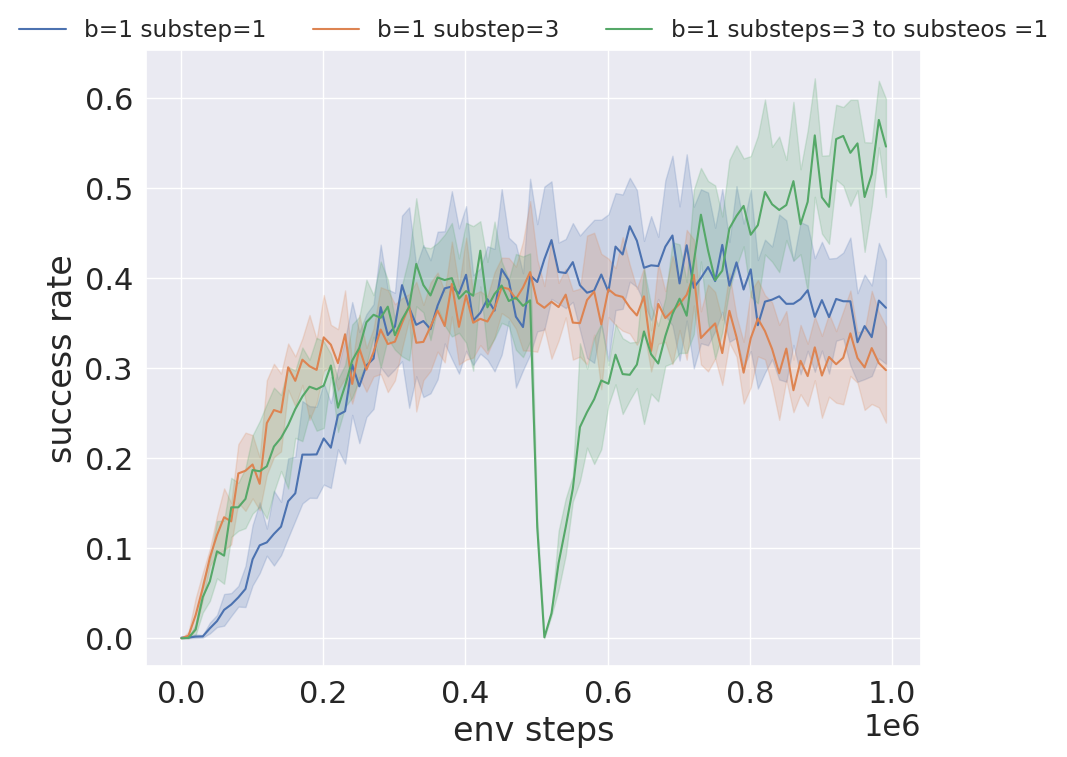

In [99]:
data_plot = pd.concat([
df_b_1_substeps1,
df_b_1_substeps3,
# df_b_1_substeps5,
# df_b1_substep5tosubstep1,
df_b1_substep3tosubstep1

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

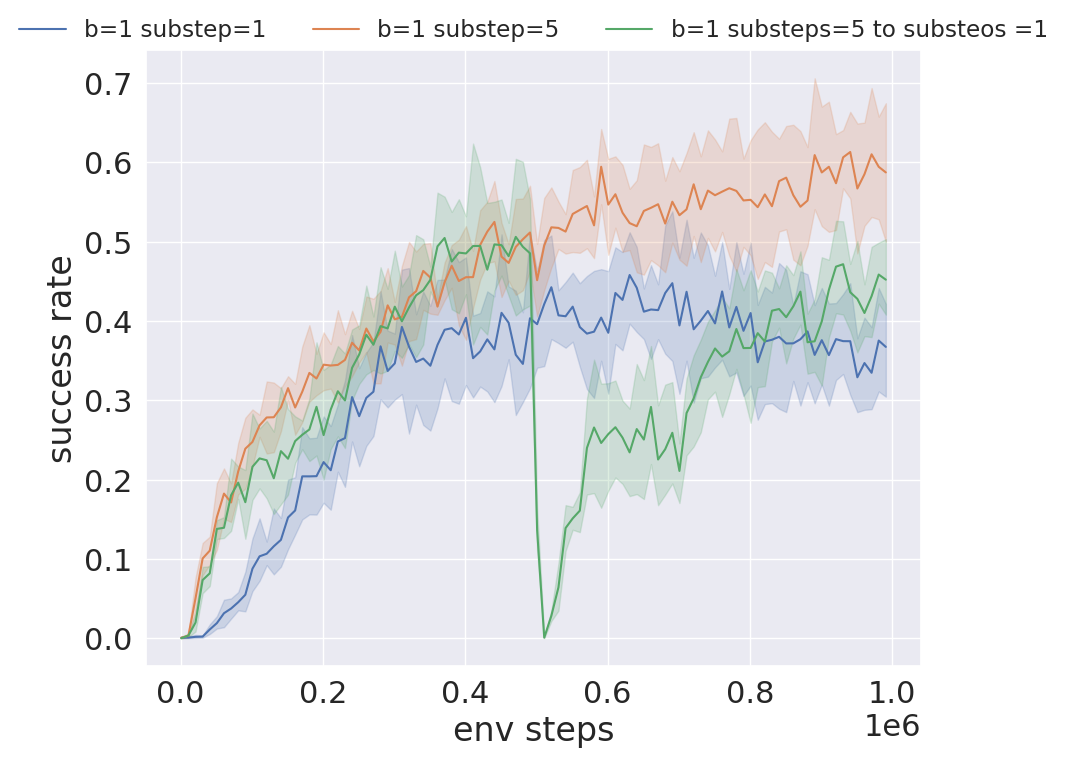

In [100]:
data_plot = pd.concat([
df_b_1_substeps1,
#df_b_1_substeps3,
df_b_1_substeps5,
df_b1_substep5tosubstep1,
#df_b1_substep3tosubstep1

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

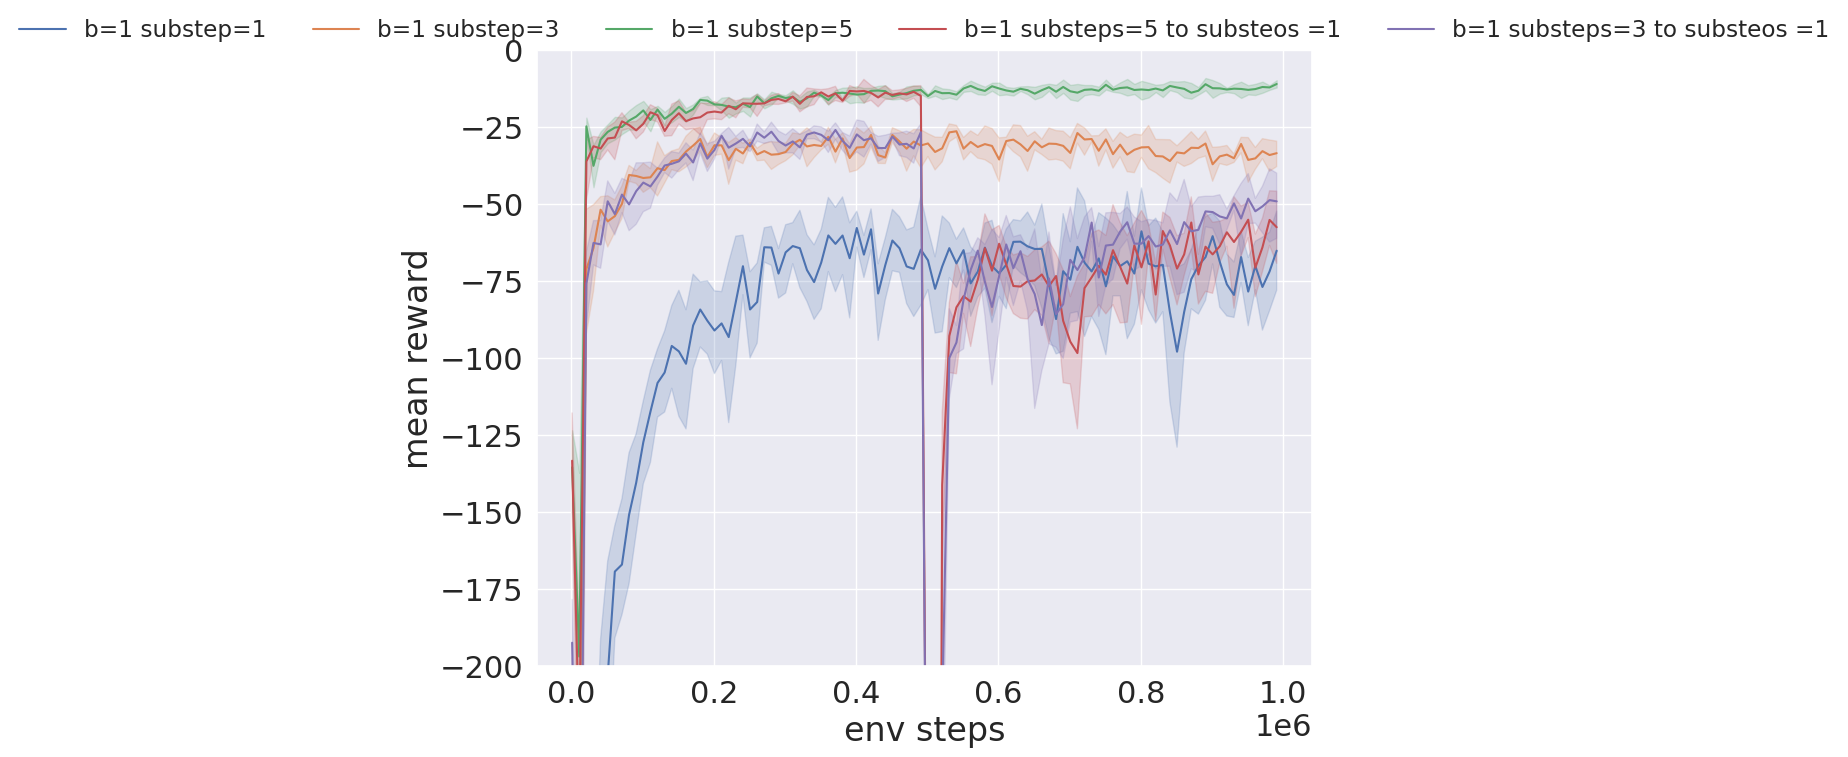

In [101]:
data_plot2 = pd.concat([
df_b_1_substeps1,
df_b_1_substeps3,
df_b_1_substeps5,
df_b1_substep5tosubstep1,
df_b1_substep3tosubstep1
])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")
ax2.set_ylim(-200, 0)
sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# f2.savefig("sac_easy_ablation_her_in_rl_cumulate_rewards.pdf", format="pdf", bbox_inches="tight")

# reach dense sac d2d

In [102]:
files = [
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2= pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))

files = [
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1= pd.concat([load_data("b=1", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1))


files = [
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05= pd.concat([load_data("b=0.5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05))



files = [
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_025/sac_10hz_128_128_b_025_1e6steps_seed_1_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_025/sac_10hz_128_128_b_025_1e6steps_seed_2_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_025/sac_10hz_128_128_b_025_1e6steps_seed_3_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_025/sac_10hz_128_128_b_025_1e6steps_seed_4_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_025/sac_10hz_128_128_b_025_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025= pd.concat([load_data("b=0.25", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_025))



files = [
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_1_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_2_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_3_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_4_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_0125= pd.concat([load_data("b=0.125", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_0125))



first_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL", 
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL", 
]
second_files = [
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
     "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL",  
    "D2D/panda_reach_dense/goal_range_08/distance_0_01_change_z_scope/dense/sac/D2D/two_stage_b2_b05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b2_b05 = pd.concat([load_two_stage_data("b=2  to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b2_b05))

500
500
500
500
500
500


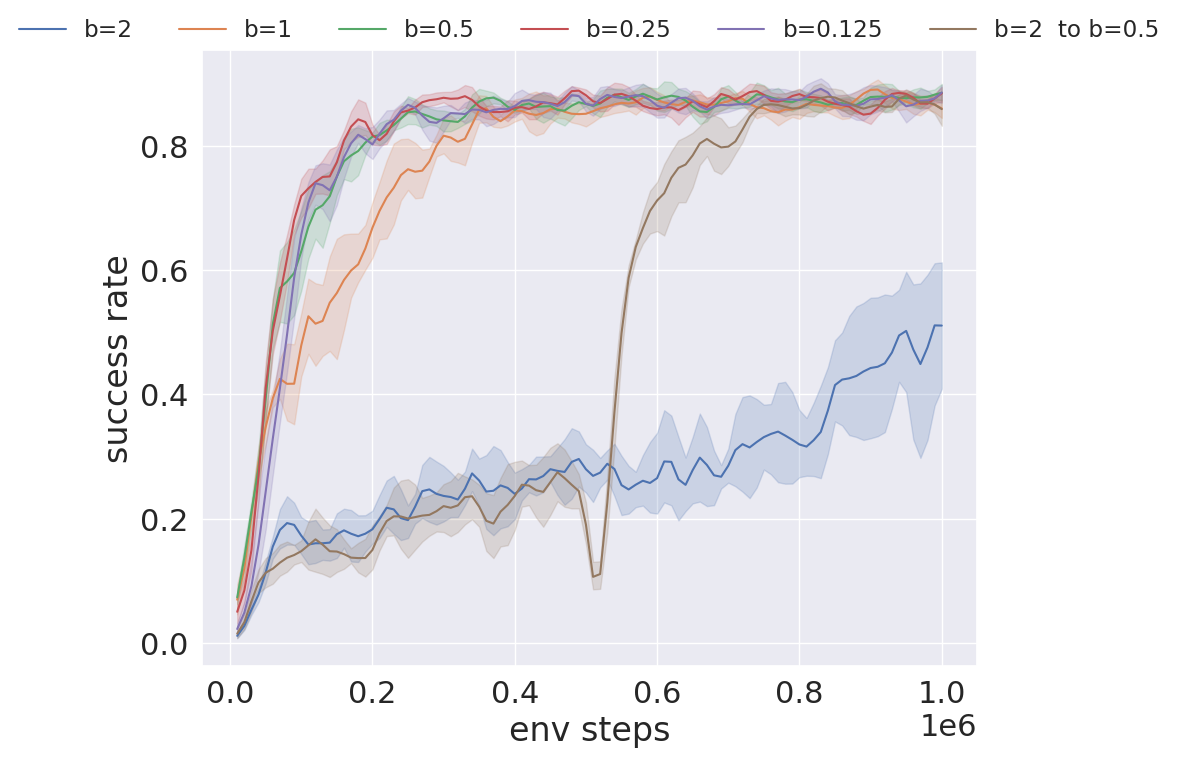

In [103]:
data_plot = pd.concat([
df_b_2,
df_b_1,
df_b_05,
df_b_025,
df_b_0125,
df_b2_b05,
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

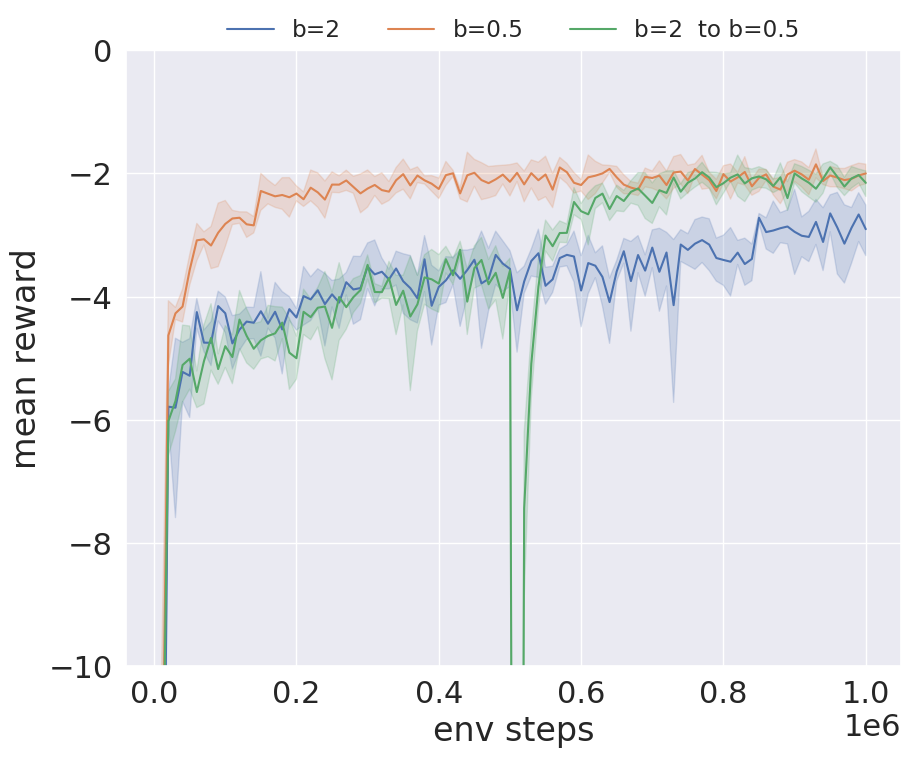

In [107]:
data_plot2 = pd.concat([
df_b_2,
# df_b_1,
df_b_05,
# df_b_025,
# df_b_0125,
df_b2_b05,
])
# 取部分数据做图
f2, ax2 = plt.subplots(figsize=(10, 8))
ax2 = sns.lineplot(x="time/total_timesteps", y="eval/mean_reward", hue="algo", data=data_plot2, ax=ax2)
# ax.axhline(y=0.61, c='g', ls='--', lw=1, label='bc')
# ax.axhline(y=0., c='b', ls='--', lw=1, label='rl_single')
# plt.legend()  # 显示水平辅助线的图例
# ax.set_xlabel("训练步数", fontproperties=SimHei)
# ax.set_ylabel("任务完成率", fontproperties=SimHei)
ax2.set_xlabel("env steps")
ax2.set_ylabel("mean reward")
# ax2.set_title("generation = 1")
ax2.set_ylim(-10, 0)
sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small")

# f2.savefig("sac_easy_ablation_her_in_rl_cumulate_rewards.pdf", format="pdf", bbox_inches="tight")